In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/.dependencies/pyplot-perso")
from plttools import PltTools
path_figures = current_path # git_path + "/figures/"
path_data = git_path + "/.dependencies/lammpstutorials-inputs/"+path_in_folder.split('/')[-2]+"/"

In [3]:
color0_light = np.array([0.5, 0.5, 0.5])
color1_light = np.array([1, 0.682, 0.286])
color2_light = np.array([0.008, 0.294, 0.478])
color3_light = np.array([0.267, 0.647, 0.761])

color0_dark = np.array([0.5, 0.5, 0.5])
color1_dark = np.array([1, 0.8, 0.5])
color2_dark = np.array([0.24, 0.58, 1.0])
color3_dark = np.array([0.4, 0.75, 0.85])

colors_light = {
    "color0": color0_light,
    "color1": color1_light,
    "color2": color2_light,
    "color3": color3_light,
}

colors_dark = {
    "color0": color0_dark,
    "color1": color1_dark,
    "color2": color2_dark,
    "color3": color3_dark,
}

In [4]:
log = lammps_logfile.File(path_data + "generate.log")
timestep = 1

time, vol, dens, temp = [], [], [], []
for i in [0, 1, 2]:
    time.append(log.get("Step", run_num=i)*timestep/1000) # ps
    vol.append(log.get("Volume", run_num=i))
    dens.append(log.get("Density", run_num=i))
    temp.append(log.get("Temp", run_num=i))

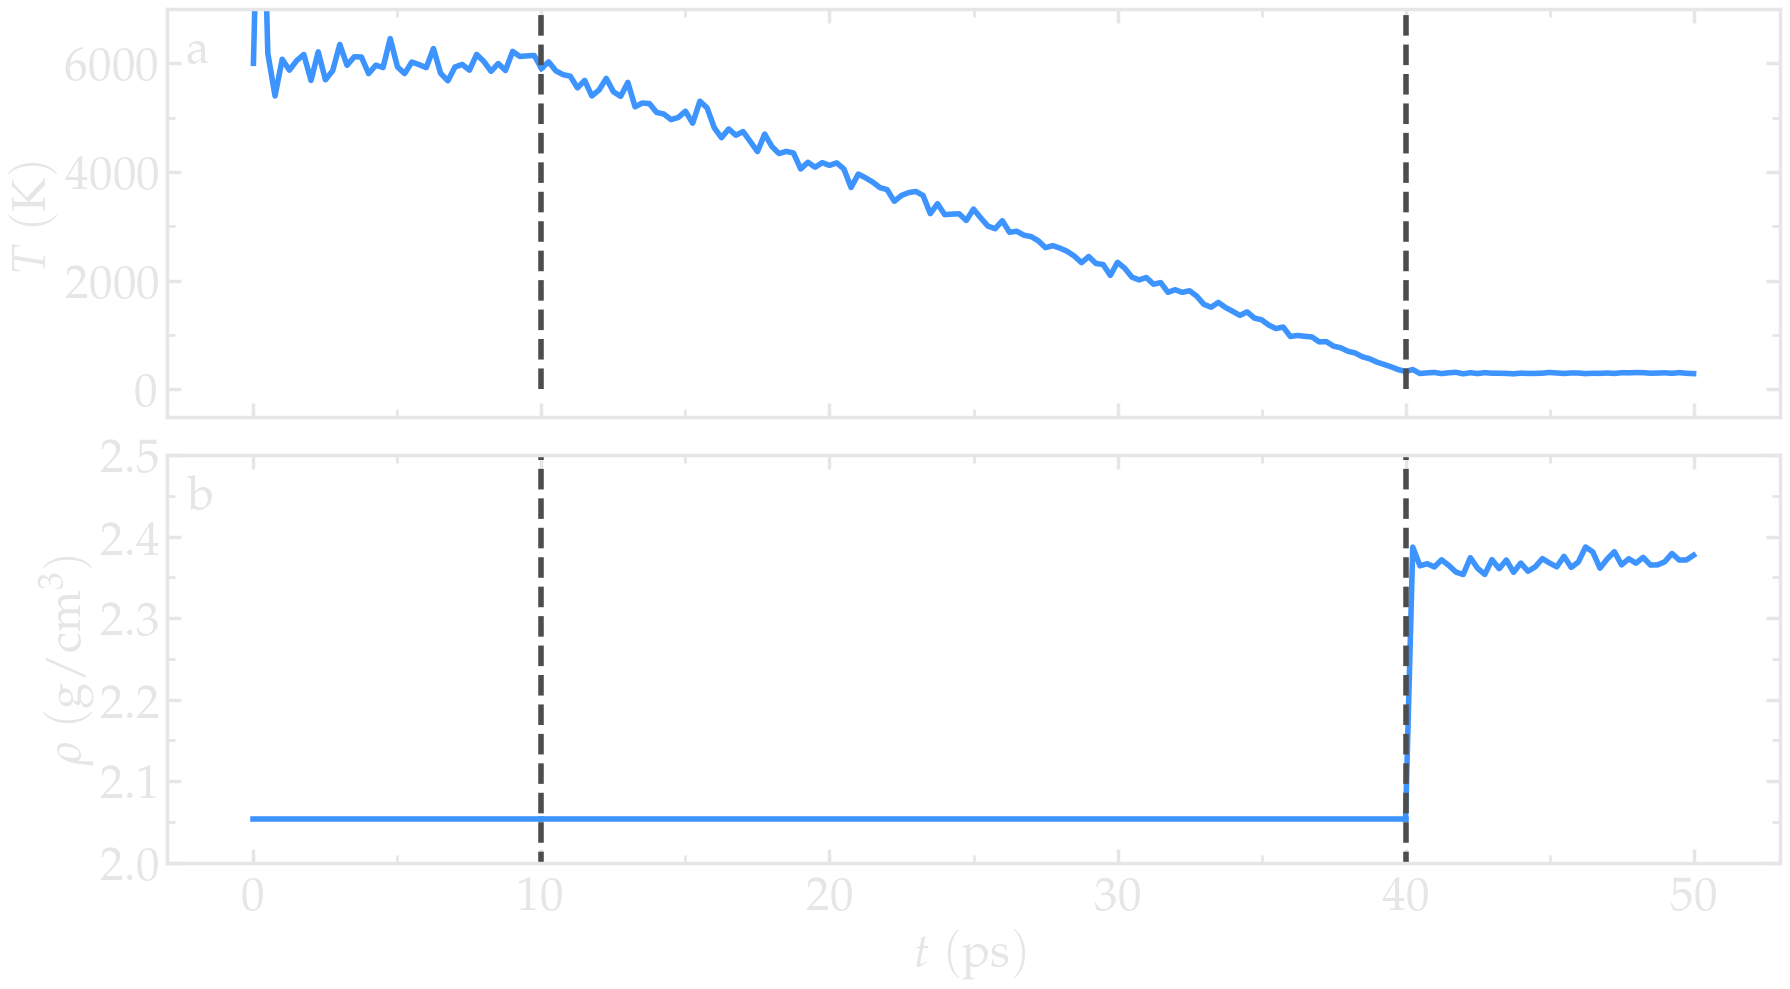

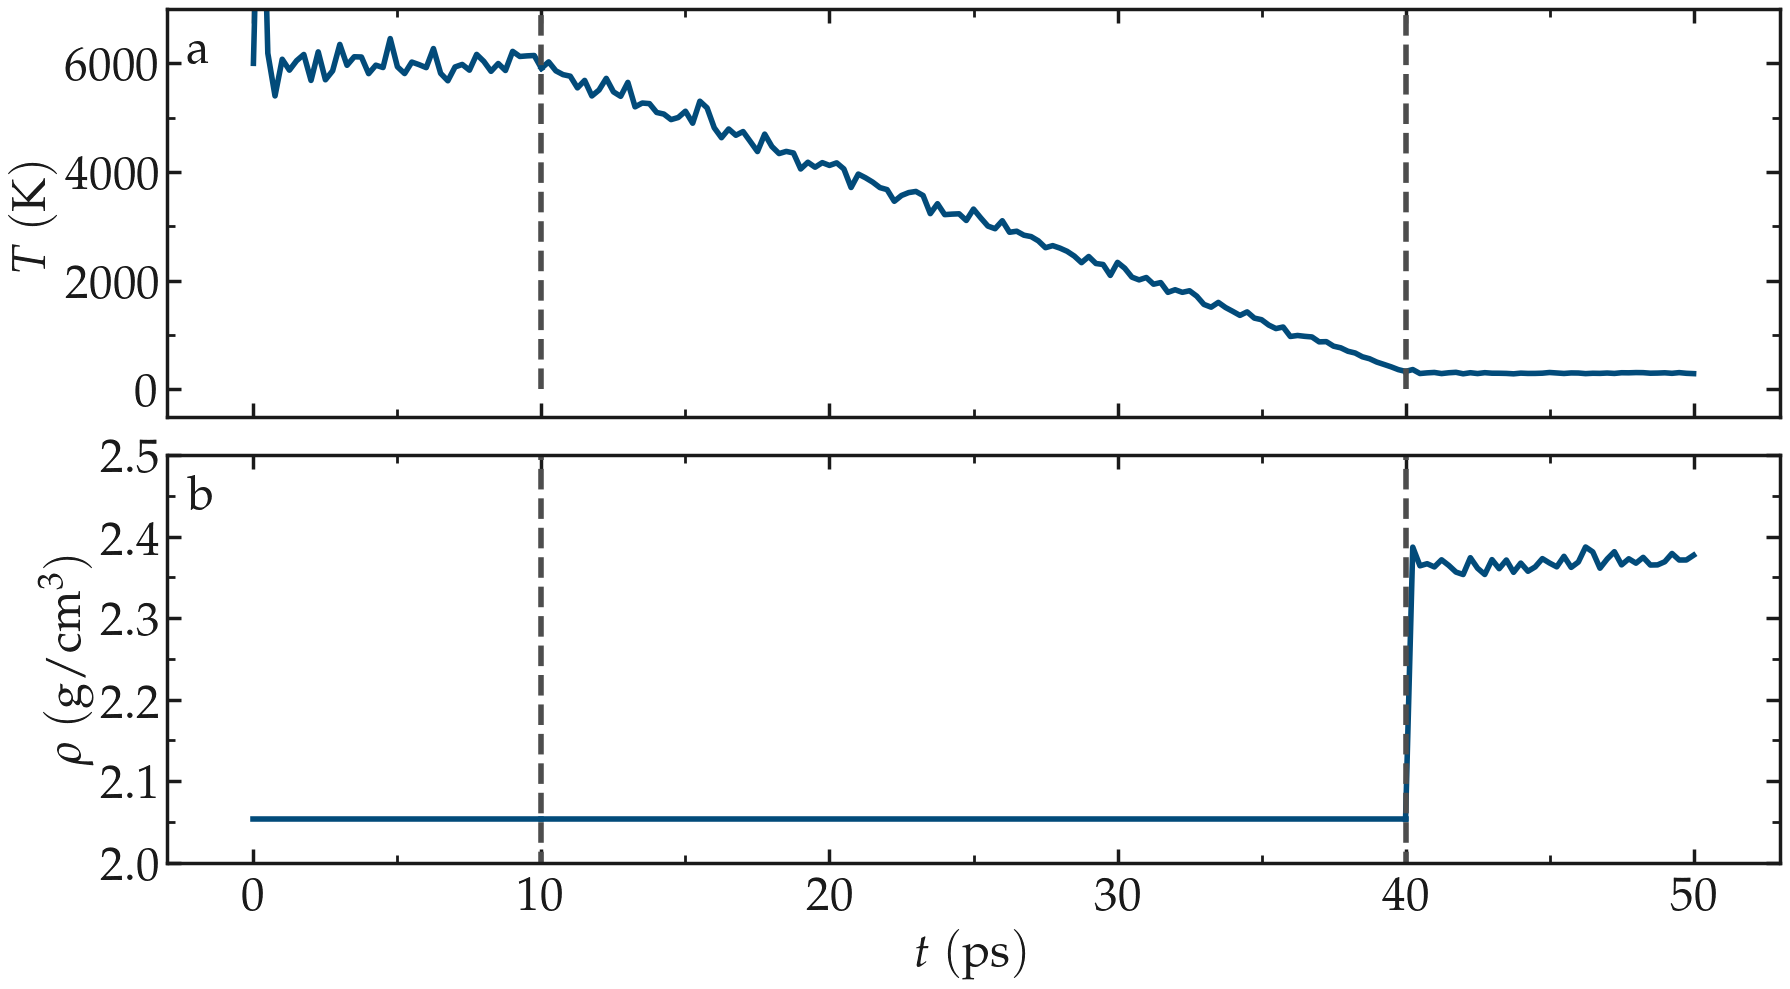

In [6]:
filename = "GCMC-dimension"

for dark_mode in [True, False]:

    colors = colors_dark if dark_mode else colors_light
    globals().update(colors)

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,10), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_colone=1, n_line=2)
    
    # Panel a
    myplt.add_panel()
    for i in [0, 1, 2]:
        myplt.add_plot(x = time[i], y = temp[i], type = "plot", linewidth_data = 3,
                    marker = "-", data_color = color2, markersize = 12)
    x = np.linspace(0, 7000)
    myplt.add_plot(x = x*0+10, y = x, type = "plot", linewidth_data = 3,
                marker = "--", data_color = np.array([0.3, 0.3, 0.3]), markersize = 12)
    myplt.add_plot(x = x*0+40, y = x, type = "plot", linewidth_data = 3,
                marker = "--", data_color = np.array([0.3, 0.3, 0.3]), markersize = 12)
    myplt.complete_panel(ylabel = r'$T ~ (\mathrm{K})$',
                        xlabel = None, xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 55, 10), y_ticks=np.arange(0, 7201, 2000),
                        x_boundaries=(-3, 53), y_boundaries=(-500, 7000))

    # Panel b
    myplt.add_panel()
    for i in [0, 1, 2]:
        myplt.add_plot(x = time[i], y = dens[i], type = "plot", linewidth_data = 3,
                    marker = "-", data_color = color2, markersize = 12)
    x = np.linspace(0, 7000)
    myplt.add_plot(x = x*0+10, y = x, type = "plot", linewidth_data = 3,
                marker = "--", data_color = np.array([0.3, 0.3, 0.3]), markersize = 12)
    myplt.add_plot(x = x*0+40, y = x, type = "plot", linewidth_data = 3,
                marker = "--", data_color = np.array([0.3, 0.3, 0.3]), markersize = 12)
    myplt.complete_panel(ylabel = r'$\rho ~ (\mathrm{g}/\mathrm{cm}^3)$',
                        xlabel = r'$t~(\mathrm{ps})$', xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 55, 10), y_ticks=np.arange(2, 2.51, 0.1),
                        x_boundaries=(-3, 53), y_boundaries=(2, 2.5))

    # Print figure
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = path_figures)